In [16]:
#import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [17]:
# Step 1: Download the MNIST dataset
torchvision.datasets.MNIST(root='./data', train=True, download=True)
torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Step 2: Load the raw MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

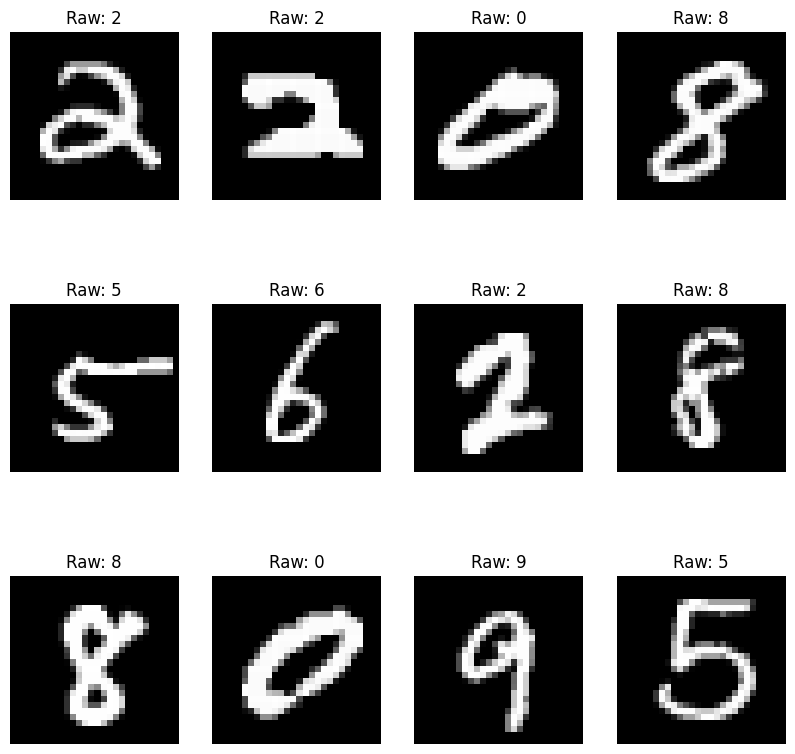

In [18]:
# Visualize the datasets
def show_images(images, labels, label_header="True"):
    figure = plt.figure(figsize=(10, 10))
    rows, cols = 3, 4
    for i in range(1, rows*cols+1):
        figure.add_subplot(rows, cols, i)
        plt.axis(False)
        plt.title(f"{label_header}: {labels[i-1].item()}")
        plt.imshow(images[i-1].permute(1, 2, 0), cmap='gray')

    plt.show()

# Get a batch of images and show
images, labels = next(iter(trainloader))
show_images(images, labels, label_header="Raw")

In [19]:
# Step 3: Preprocessing Step: Normalization and Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(10),  # Randomly rotate the image by 10 degrees
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Random translation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the same way for test set
])

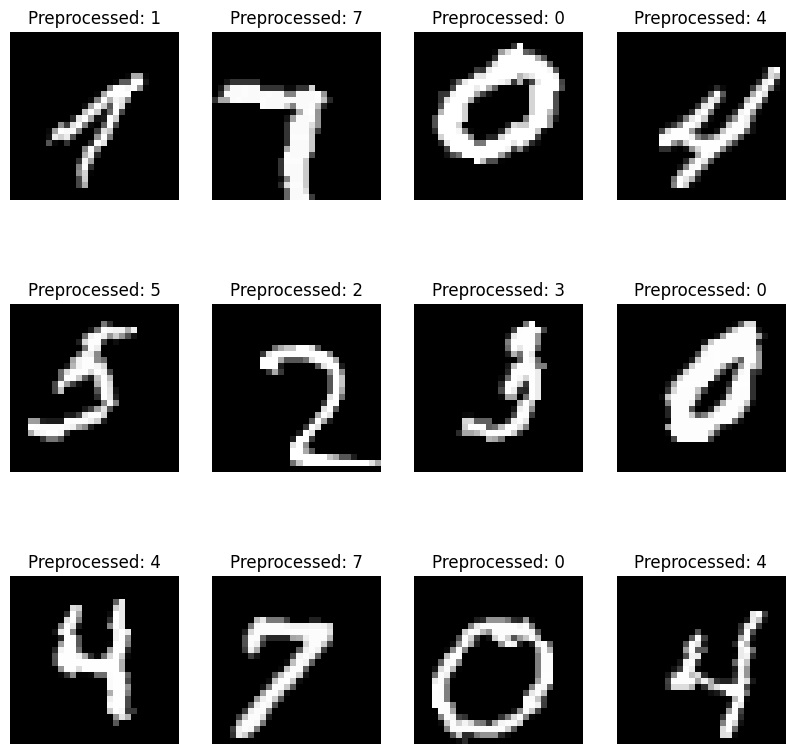

In [20]:
# Step 4: Load the MNIST dataset with preprocessing applied
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Visualize Some Preprocessed Images
preprocessed_images, preprocessed_labels = next(iter(trainloader))
show_images(preprocessed_images, preprocessed_labels, label_header="Preprocessed")